In [9]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

def calculate_ndci(caminho_b5, caminho_b4):
    with rasterio.open(caminho_b5) as src_b5, rasterio.open(caminho_b4) as src_b4:
        # Ler os dados das bandas como matrizes numpy
        b5 = src_b5.read(1).astype(float)
        b4 = src_b4.read(1).astype(float)

        # Calcular e imprimir o maior e o menor valor após a normalização
        print(f'Max value in b5: {np.max(b5)}')
        if np.min(b5)==0:
            # Encontrar o menor valor em b5 maior que zero
            min_positive_b5 = np.min(b5[(b5 > 0)])
            # Exibir o menor valor presente em b5 maior que zero
            print(f'Min value in b5: {min_positive_b5}')
        else:
            print(f'Min value in b5: {np.min(b5)}')
        print(f'Max value in b4: {np.max(b4)}')
        if np.min(b4)==0:
            # Encontrar o menor valor em b4 maior que zero
            min_positive_b4 = np.min(b4[(b4 > 0)])
            # Exibir o menor valor presente em b4 maior que zero
            print(f'Min value in b4: {min_positive_b4}')
        else:
            print(f'Min value in b4: {np.min(b4)}')

        # Mostrar o número de elementos em b4
        print(f'Number of elements in b4: {np.size(b4)}')
        # Mostrar o número de elementos em b5
        print(f'Number of elements in b5: {np.size(b5)}')

        # Contar o número de elementos com valor 0 em b4
        num_zeros_b4 = np.count_nonzero(b4 == 0)
        print(f'Number of elements with value 0 in b4: {num_zeros_b4}')
        # Contar o número de elementos com valor 0 em b5
        num_zeros_b5 = np.count_nonzero(b5 == 0)
        print(f'Number of elements with value 0 in b5: {num_zeros_b5}')

        # Máscara para considerar apenas valores diferentes de zero em b5 e b4
        mask_nonzero = (b5 != 0) & (b4 != 0)

        # Calcular NDCI apenas para os valores não nulos em b5 e b4
        ndci = np.zeros_like(b5, dtype=float)
        ndci[mask_nonzero] = (b5[mask_nonzero] - b4[mask_nonzero]) / (b5[mask_nonzero] + b4[mask_nonzero])

        # Exibir o NDCI resultante
        print(f'Max value in ndci: {np.max(ndci)}')
        # Encontrar o menor valor em ndci maior que zero
        min_positive_ndci = np.min(ndci[(ndci > 0)])
        # Exibir o menor valor presente em ndci maior que zero
        print(f'Min value in ndci: {min_positive_ndci}')

        # Exibir o NDCI
        plt.imshow(ndci, cmap='RdYlGn', vmin=-1, vmax=1)
        plt.colorbar(label='NDCI')
        plt.title('Índice de Concentração de Deoxirribonucleico (NDCI)')
        plt.show()

Max value in b5: 10409.0
Min value in b5: 6803.0
Max value in b4: 7709.0
Min value in b4: 5815.0
Number of elements in b4: 9595
Number of elements in b5: 9595
Number of elements with value 0 in b4: 205
Number of elements with value 0 in b5: 205
Max value in ndci: 0.23176973565364004
Min value in ndci: 0.07535493265380415


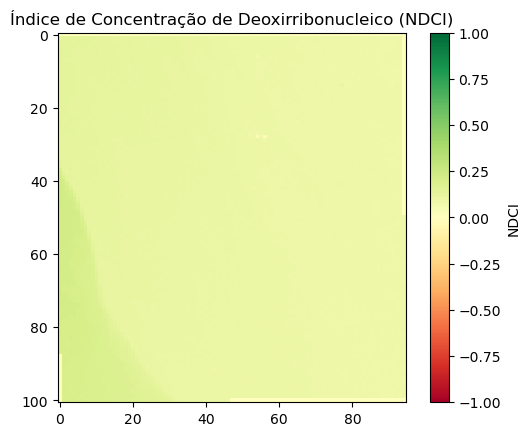

In [10]:
# Exemplo de uso da função
caminho_b4 = '/home/barcelos/Desktop/LL14/LL14CUTB4/LC08_L1TP_215074_20141229_20200910_02_T1_B4_CUT.tif'
caminho_b5 = '/home/barcelos/Desktop/LL14/LL14CUTB5/LC08_L1TP_215074_20141229_20200910_02_T1_B5_CUT.tif'
calculate_ndci(caminho_b4, caminho_b5)